# Conceito de p-valor: um exemplo simples

Vamos ilustrar o conceito de **p-valor** com um experimento simples de lançamento de moeda.

## Contexto
Uma pessoa afirma que uma moeda é **viciada** e tende a cair mais em **caras**.

- Hipótese nula $H_0$: a moeda é **justa**. Logo, $P(\text{cara}) = 0{,}5$.
- Hipótese alternativa $H_1$: a moeda é **viciada para mais caras**.

Lançamos a moeda **20 vezes** e observamos **16 caras**.
Vamos calcular o p-valor correspondente a esse experimento.

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parâmetros
n = 20       # número de lançamentos
p = 0.5      # probabilidade de sucesso sob H0 (moeda justa)
k_obs = 16    # número de caras observadas

# Calculando o p-valor (probabilidade de obter 8 ou mais caras)
# A função binom.sf(k_obs - 1, n, p) calcula P(X >= k_obs)
p_valor = binom.sf(k_obs - 1, n, p)
print(f"p-valor = {p_valor:.4f}")

p-valor = 0.0059


## 📊 Visualizando a distribuição binomial e o p-valor
No gráfico abaixo, está destacada em vermelho a região do p-valor na distribuição.

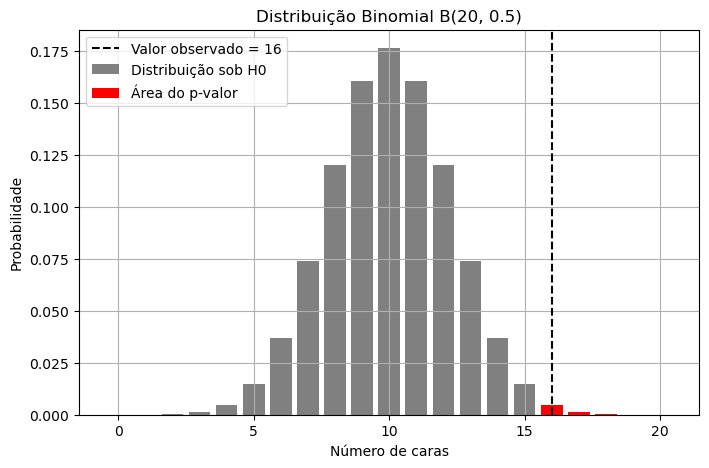

In [7]:
# Visualização
x = range(n + 1)
pmf = binom.pmf(x, n, p)

plt.figure(figsize=(8, 5))
plt.bar(x, pmf, color='gray', label='Distribuição sob H0')
plt.bar([k for k in x if k >= k_obs], [pmf[k] for k in x if k >= k_obs], 
        color='red', label='Área do p-valor')
plt.axvline(k_obs, color='black', linestyle='--', label=f'Valor observado = {k_obs}')
plt.title(f'Distribuição Binomial B({n}, {p})')
plt.xlabel('Número de caras')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

## Conclusão

No exemplo acima, **p-valor** representa a **probabilidade de obter 16 ou mais caras** em 20 lançamentos, se a moeda for justa.

- Se o p-valor for < 0.05, rejeitamos $H_0$ e aceitamos $H_1$: há evidência de que a moeda pode ser viciada.
- Em caso contrário, **não há evidência suficiente** contra $H_0$.

Visto que $0.0059 < 0.05$, concluímos que a moeda é viciada.

> repare que, para decidirmos se a moeda é ou não viciada, tivemos que usar um ponto de corte (0,05 neste caso).

### Tabela Resumo
| Elemento             | Significado                                                  |
|----------------------|--------------------------------------------------------------|
| Hipótese nula $H_0$ | A moeda é justa ($P = 0{,}5$)                            |
| Estatística observada | 8 caras em 10 lançamentos                                    |
| p-valor               | Probabilidade de observar **8 ou mais** caras se $H_0$ for verdadeira |
| Conclusão (se p < 0.05) | Rejeita-se $H_0$; evidência de que a moeda é viciada     |